# Data visualization

The goal, as mentioned in the README, is to practice how we can use dimensionality reduction methods 
to visualize datasets. As such, we won't be going too deep into the methods themselves other than 
a generic explanation on how they work. 

In [40]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../data/mushrooms.csv")

# Dataset

The dataset used is called [Mushroom classification](https://www.kaggle.com/datasets/uciml/mushroom-classification). 
The name speaks mostly for itself, containing features about different mushrooms.

My reason for picking this dataset is that it contains no labels about the mushrooms, making it so 
we have to use some techniques to figure out how many categories we are working with. The answer is 
23, but this is not known in the dataset. 

Also, for the fact that it contains enough features, but all of them are simple to interpret.

# Visualization

## Goal

See if we can visualize all of the 23 classes of mushrooms using the chosen techniques. Secondarily, 
might be interesting to see if we can distinguish between poisonous and edible this way.

## Data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

It seems we are working with 23 distinct features for this dataset. Additionally, we appear to have 
8124 rows, none of which are null, saving us cleaning time.

In [42]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We know from the problem description that we have a single target column, class, which we'll 
separate later from the features. 

Furthermore it appears we have 22 categorical columns, all of them with a letter code. This means 
we'll need to encode them to numbers if we want to continue. I'm not interested in what these 
letters mean for now, but i do want to know their distribution. 

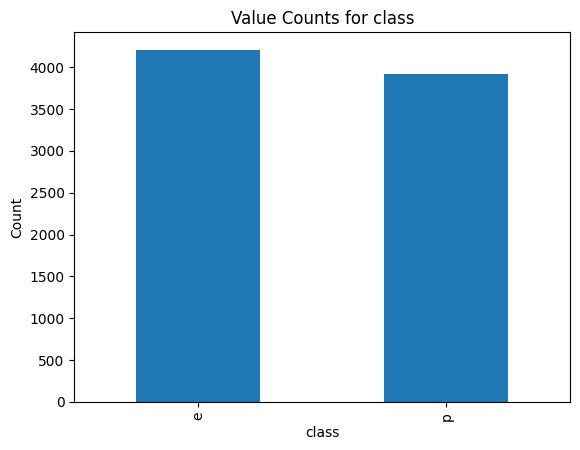

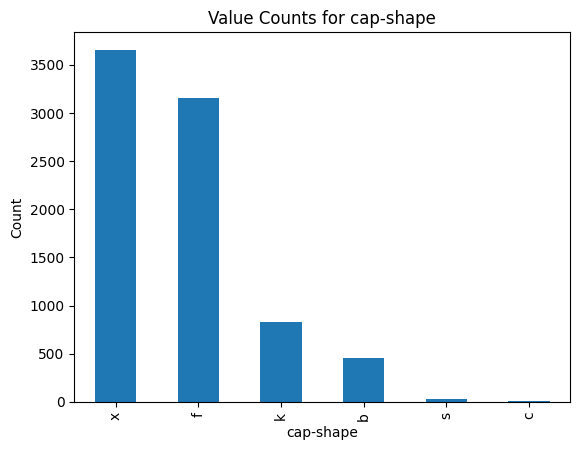

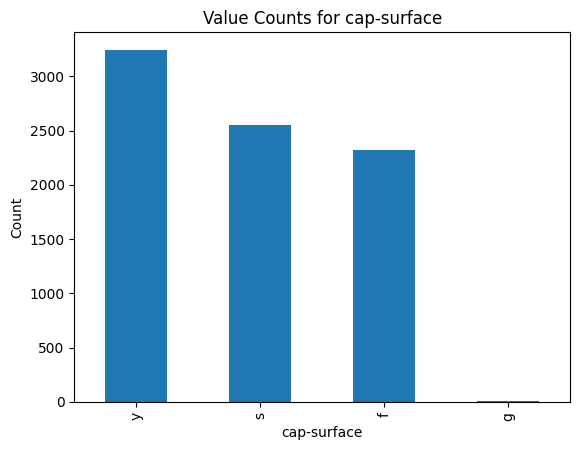

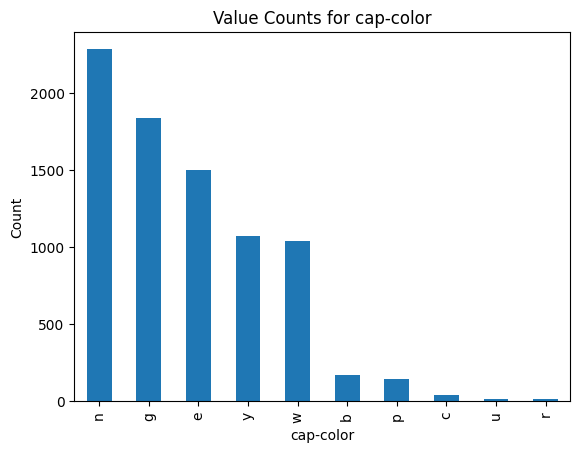

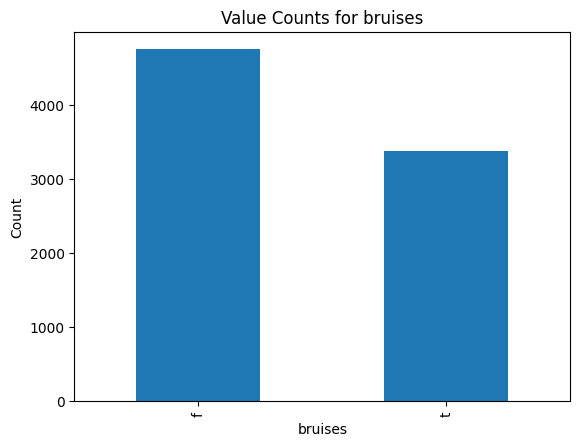

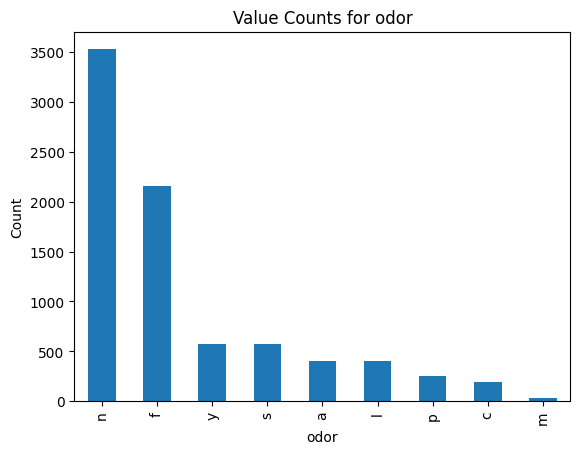

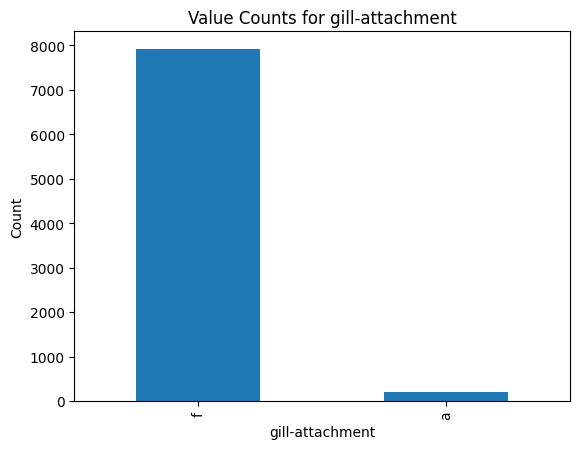

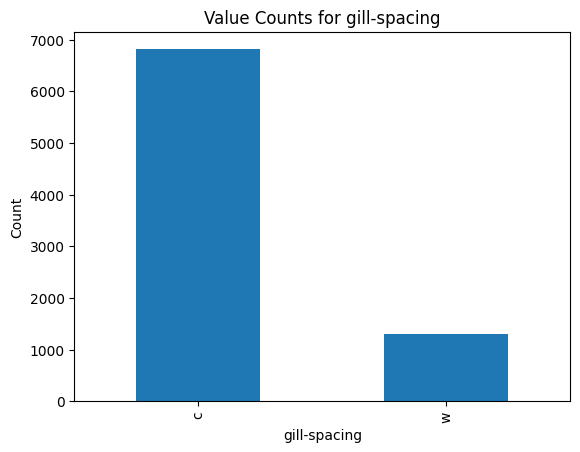

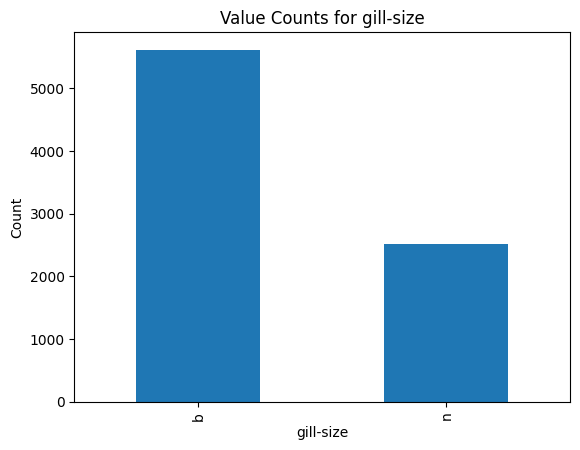

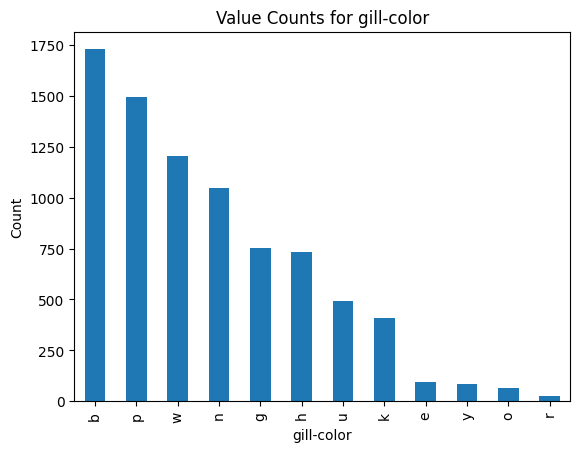

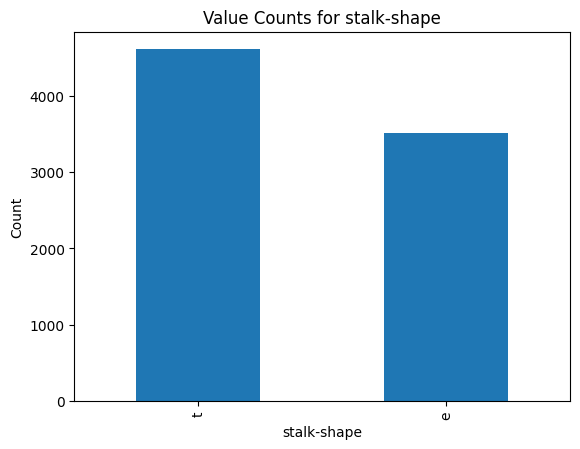

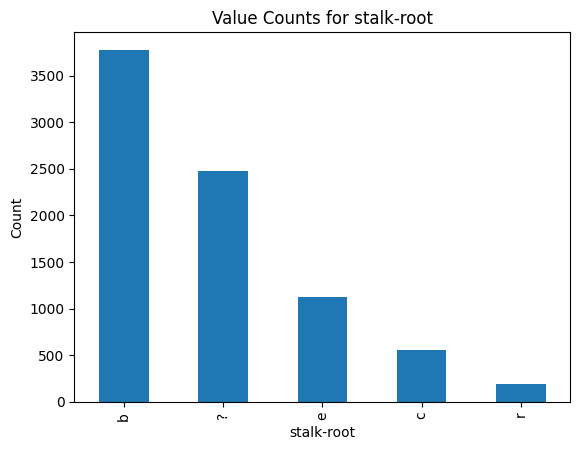

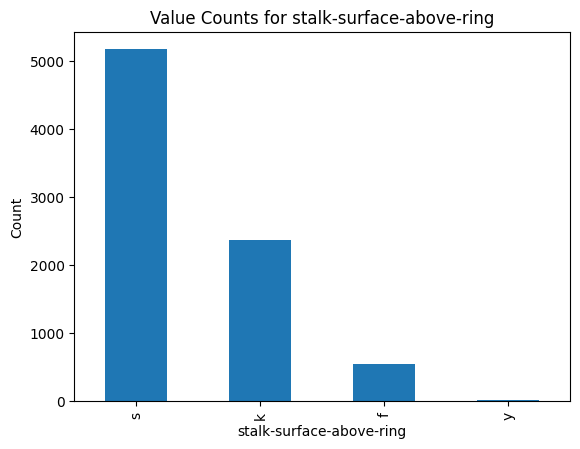

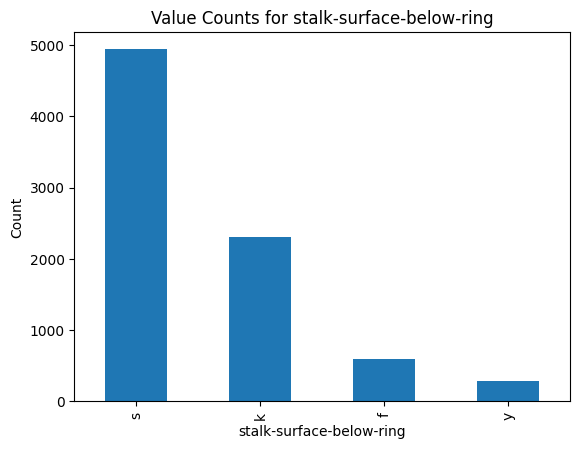

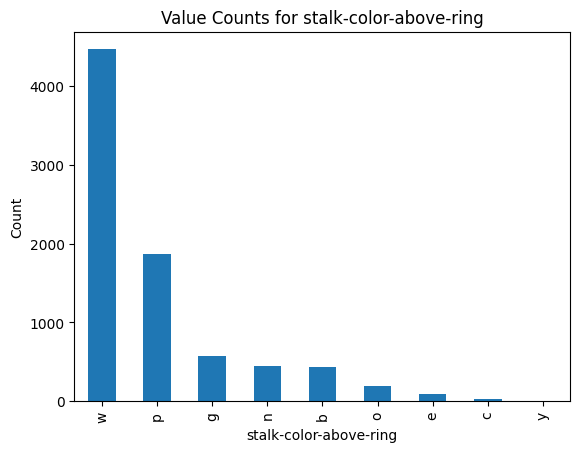

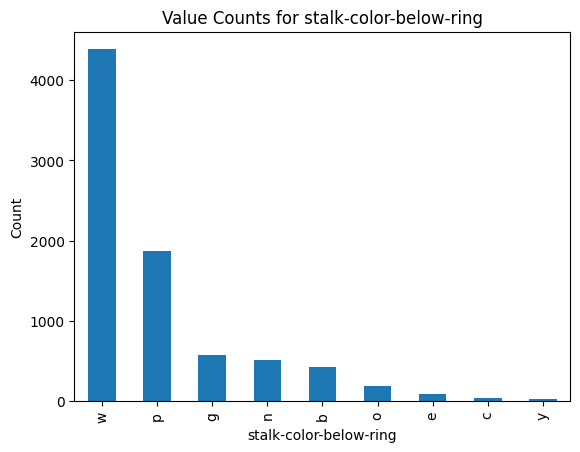

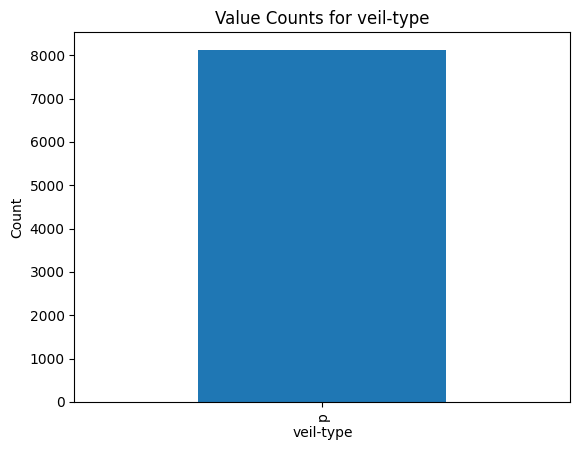

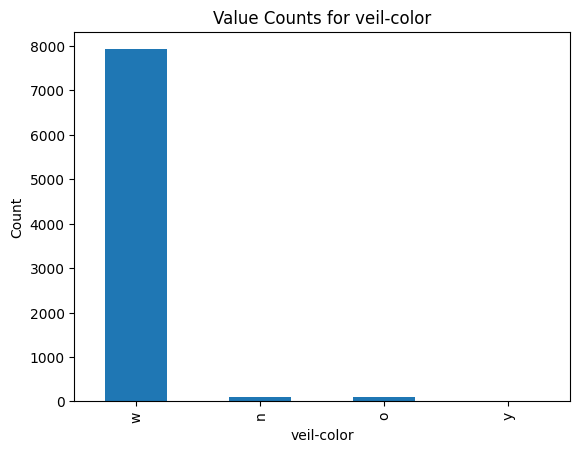

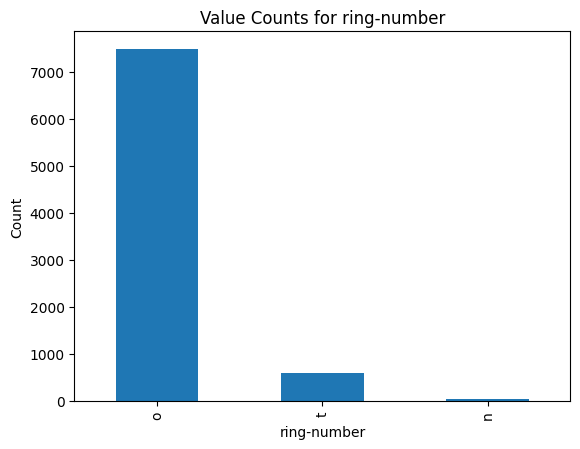

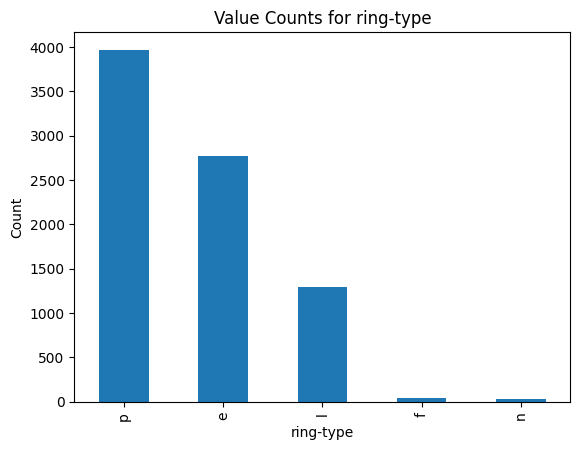

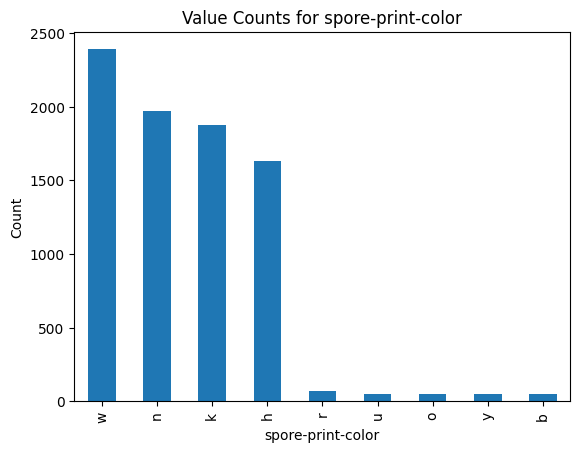

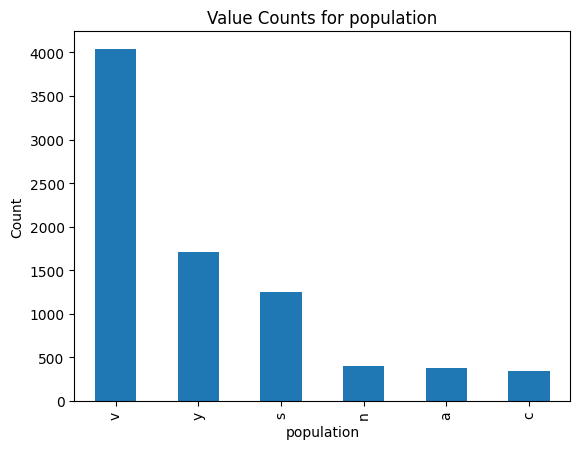

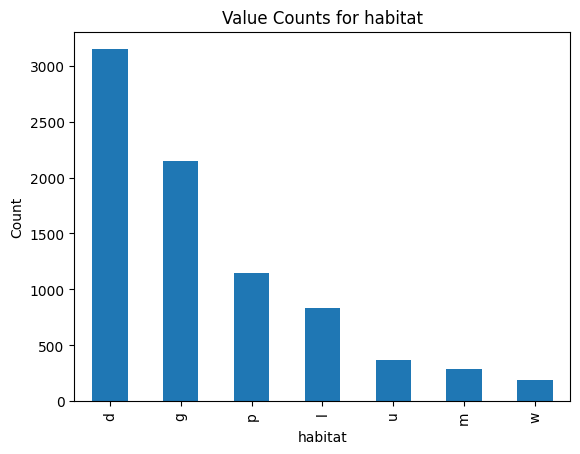

In [43]:
def plot_value_counts(df):
    for col in df.columns:
        value_counts = df[col].value_counts()
        
        # Plot the value counts
        ax = value_counts.plot(kind='bar', title=f'Value Counts for {col}')
        ax.set_ylabel('Count')
        plt.show()

plot_value_counts(df)

With this we can make some basic observations

- The class has a roughly 50/50 spread
- Some columns like gill-attachment and veil-color have a very dominant category, while others 
like habitat have a more distributed spread.

## Data cleaning

As mentioned, we'll need to encode the columns. We'll do this with a basic Ordinal Encoder, as 
i don't expect the ordering to be an issue.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

encoded = encoder.fit_transform(df)
encoded = pd.DataFrame(encoded, columns=df.columns)
encoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1.0,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0.0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0.0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0.0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1.0,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


In [47]:
y = encoded["class"]
X = encoded.drop("class", axis=1)

## Techniques

### PCA

Principal Component Analysis is a common dimensionality reduction technique. I chose this because 
it's a popular technique, and because if our dataset has linear properties it can be very useful.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced = pd.DataFrame(X_reduced, columns=["PC1", "PC2"])
X_reduced

,PC1,PC2
0,0.228207,-0.345472
1,-1.936561,4.796912
2,-1.654173,2.464362
3,-1.252026,1.679664
4,1.581220,-1.002043
...,...,...
8119,-6.469823,-2.308511
8120,-6.525909,-2.280695
8121,-1.860507,0.470244
8122,7.293068,-1.251693


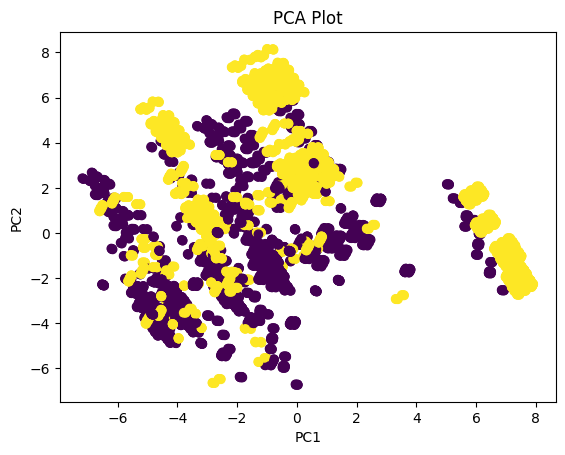

In [49]:
# Create PCA plot
fig, ax = plt.subplots()
ax.scatter(X_reduced["PC1"], X_reduced["PC2"], c=y)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Plot")
plt.show()